In [1]:
import pandas as pd

df = pd.read_csv("amazon_filtered_data.csv")

In [2]:
df

,headline
0,"Pro-WikiLeaks hacker crackdowns continue, FBI ..."
1,"Opening Bell: Markets mixed on U.S. GDP, earni..."
2,FP Deal Flow: Naysayers pour cold water on soc...
3,Getting cloud computing right
4,"Bootup: Naming Canada's anti-spam law, Apple i..."
...,...
6288,Bill Gates-Led Fund Raises Another $1 Billion ...
6289,"Loop Insights Integrates Bitcoin, Ethereum and..."
6290,HempFusion's Wholly Owned Subsidiary Probulin ...
6291,Zynga Launches Harry Potter: Puzzles & Spells ...


In [3]:
text = df['headline']

In [4]:
!pip install vaderSentiment

In [5]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

  
    # Create a SentimentIntensityAnalyzer object. 
sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores.
sentiment=[]
for i in text:
  sentiment_dict = sid_obj.polarity_scores(i)
  if sentiment_dict['compound'] >= 0.05 :
    sentiment.append('Positive')
   
  
  elif sentiment_dict['compound'] <= - 0.05 : 
    sentiment.append('Negative')
  
  
  else : 
    sentiment.append('Neutral')

df2 = pd.DataFrame(sentiment,columns=['Sentiment'])
   

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df2

,Sentiment
0,Neutral
1,Negative
2,Neutral
3,Neutral
4,Neutral
...,...
6288,Positive
6289,Positive
6290,Positive
6291,Neutral


In [8]:
frames = [df,df2]

df3 = pd.concat(frames,axis = 1)

In [9]:
df3

,headline,Sentiment
0,"Pro-WikiLeaks hacker crackdowns continue, FBI ...",Neutral
1,"Opening Bell: Markets mixed on U.S. GDP, earni...",Negative
2,FP Deal Flow: Naysayers pour cold water on soc...,Neutral
3,Getting cloud computing right,Neutral
4,"Bootup: Naming Canada's anti-spam law, Apple i...",Neutral
...,...,...
6288,Bill Gates-Led Fund Raises Another $1 Billion ...,Positive
6289,"Loop Insights Integrates Bitcoin, Ethereum and...",Positive
6290,HempFusion's Wholly Owned Subsidiary Probulin ...,Positive
6291,Zynga Launches Harry Potter: Puzzles & Spells ...,Neutral


In [10]:
df3.to_csv('Amazon_Sentiments.csv')

In [11]:
df3.dtypes

headline     object
Sentiment    object
dtype: object

In [23]:
df4 = pd.read_csv('Amazon_Sentiments.csv')

In [24]:
df4

,Unnamed: 0,headline,Sentiment
0,0,"Pro-WikiLeaks hacker crackdowns continue, FBI ...",Neutral
1,1,"Opening Bell: Markets mixed on U.S. GDP, earni...",Negative
2,2,FP Deal Flow: Naysayers pour cold water on soc...,Neutral
3,3,Getting cloud computing right,Neutral
4,4,"Bootup: Naming Canada's anti-spam law, Apple i...",Neutral
...,...,...,...
6288,6288,Bill Gates-Led Fund Raises Another $1 Billion ...,Positive
6289,6289,"Loop Insights Integrates Bitcoin, Ethereum and...",Positive
6290,6290,HempFusion's Wholly Owned Subsidiary Probulin ...,Positive
6291,6291,Zynga Launches Harry Potter: Puzzles & Spells ...,Neutral


In [29]:
df4 = df4.drop(labels = 'Unnamed: 0',axis = 1)

In [30]:
df4['Sentiment'] = df4['Sentiment'].replace(['Neutral','Positive','Negative'],['0','1','2'])

In [31]:
df4

,headline,Sentiment
0,"Pro-WikiLeaks hacker crackdowns continue, FBI ...",0
1,"Opening Bell: Markets mixed on U.S. GDP, earni...",2
2,FP Deal Flow: Naysayers pour cold water on soc...,0
3,Getting cloud computing right,0
4,"Bootup: Naming Canada's anti-spam law, Apple i...",0
...,...,...
6288,Bill Gates-Led Fund Raises Another $1 Billion ...,1
6289,"Loop Insights Integrates Bitcoin, Ethereum and...",1
6290,HempFusion's Wholly Owned Subsidiary Probulin ...,1
6291,Zynga Launches Harry Potter: Puzzles & Spells ...,0


In [40]:
with open('contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']

In [41]:
import re

def process_tweet(headlines):
    headlines = headlines.lower()                                             # Lowercases the string
    headlines = re.sub('@[^\s]+', '', headlines)                              # Removes usernames
    headlines = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', headlines)   # Remove URLs
    headlines = re.sub(r"\d+", " ", str(headlines))                           # Removes all digits
    headlines = re.sub('&quot;'," ", headlines)                               # Remove (&quot;) 
    headlines = emoji(headlines)                                              # Replaces Emojis
    headlines = re.sub(r"\b[a-zA-Z]\b", "", str(headlines))                   # Removes all single characters
    for word in headlines.split():
        if word.lower() in contractions:
            headlines = headlines.replace(word, contractions[word.lower()])   # Replaces contractions
    headlines = re.sub(r"[^\w\s]", " ", str(headlines))                       # Removes all punctuations
    headlines = re.sub(r'(.)\1+', r'\1\1', headlines)                         # Convert more than 2 letter repetitions to 2 letter
    headlines = re.sub(r"\s+", " ", str(headlines))                           # Replaces double spaces with single space    
    return headlines

In [42]:
def emoji(headlines):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    headlines = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', headlines)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    headlines = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', headlines)
    # Love -- <3, :*
    headlines = re.sub(r'(<3|:\*)', ' positiveemoji ', headlines)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    headlines = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', headlines)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    headlines = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', headlines)
    # Cry -- :,(, :'(, :"(
    headlines = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', headlines)
    return headlines

In [43]:
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np

In [44]:
headlines = df4.columns.values[0]
sentiment = df4.columns.values[1]
headlines, sentiment

('headline', 'Sentiment')

'headline'

In [45]:
df4['processed_headlines'] = np.vectorize(process_tweet)(df4[headlines])

In [46]:
df4.head(10)

,headline,Sentiment,processed_headlines
0,"Pro-WikiLeaks hacker crackdowns continue, FBI ...",0,pro wikileaks hacker crackdowns continue fbi e...
1,"Opening Bell: Markets mixed on U.S. GDP, earni...",2,opening bell markets mixed on gdp earnings misses
2,FP Deal Flow: Naysayers pour cold water on soc...,0,fp deal flow naysayers pour cold water on soci...
3,Getting cloud computing right,0,getting cloud computing right
4,"Bootup: Naming Canada's anti-spam law, Apple i...",0,bootup naming canada anti spam law apple ipad ...
5,Amazon.com launches Netflix rival,0,amazon com launches netflix rival
6,Netflix short sellers may yet have their day,0,netflix short sellers may yet have their day
7,Bootup: Apple iPad 2 rivals might be dead on a...,2,bootup apple ipad rivals might be dead on arrival
8,Bootup: Hackers release BofA employee emails,0,bootup hackers release bofa employee emails
9,Zediva launches Netflix rival,0,zediva launches netflix rival


In [48]:
df5 = df4

In [49]:
df5.to_csv('Preprocessing_Amazon.csv')

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df4['processed_headlines'])  
final_vectorized_data

<6293x52677 sparse matrix of type '<class 'numpy.int64'>'
	with 130637 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df4[sentiment],
                                                    test_size=0.2, random_state=69)

In [53]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

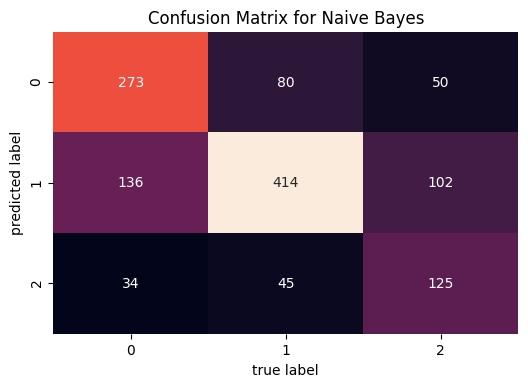

In [58]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [59]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)


Accuracy with Naive-bayes:  0.6449563145353455
